In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [11]:
import time
import matplotlib.pyplot as plt

learning_times_kernel = {}
learning_times_c = {}
learning_times_gamma = {}

In [12]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:49000]
# xtest = mnist.data[49000:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [13]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", gamma="auto")

clf.fit(xtrain, ytrain)

found_classes = clf.predict(xtest)

print("Score train : " + str(clf.score(xtrain, ytrain)))
print("Score test : " + str(clf.score(xtest, ytest)))

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Score train : 1.0
Score test : 0.9076190476190477
Classe : 0 / Attendu 0 OK
Classe : 8 / Attendu 8 OK
Classe : 3 / Attendu 3 OK
Classe : 0 / Attendu 0 OK
Classe : 7 / Attendu 7 OK
Classe : 0 / Attendu 0 OK
Classe : 4 / Attendu 4 OK
Classe : 7 / Attendu 7 OK
Classe : 4 / Attendu 4 OK
Classe : 4 / Attendu 4 OK
Classe : 4 / Attendu 4 OK
Classe : 0 / Attendu 0 OK
Classe : 6 / Attendu 6 OK
Classe : 5 / Attendu 5 OK
Classe : 8 / Attendu 8 OK
Classe : 4 / Attendu 4 OK
Classe : 0 / Attendu 0 OK
Classe : 7 / Attendu 7 OK
Classe : 3 / Attendu 3 OK


In [20]:
scores_kernel_test = []
scores_kernel_train = []
times = []

# "precomputed" ne fonctionne pas avec ce jeu de données
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    clf = SVC(kernel=kernel, gamma="auto")

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_kernel_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_kernel_train.append(score_train)
    
    print("Kernel (score test) : " + str(kernel) + " -> " + str(score_test))
    print("Kernel (score_train): " + str(kernel) + " -> " + str(score_train))


Kernel (score test) : linear -> 0.9076190476190477
Kernel (score_train): linear -> 1.0
Kernel (score test) : poly -> 0.9428571428571428
Kernel (score_train): poly -> 1.0
Kernel (score test) : rbf -> 0.1676190476190476
Kernel (score_train): rbf -> 1.0
Kernel (score test) : sigmoid -> 0.11095238095238096
Kernel (score_train): sigmoid -> 0.11387755102040817


Text(0.5, 1.0, "Temps d'exécution pour différents noyaux utilisés")

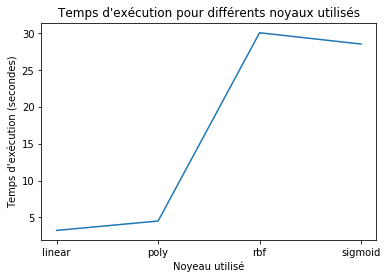

In [26]:
plt.plot([x for x in ['linear', 'poly', 'rbf', 'sigmoid']], times)

plt.xlabel("Noyeau utilisé")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différents noyaux utilisés")

In [16]:
import numpy as np

scores_c_test = []
scores_c_train = []

Cs = np.linspace(0.1, 1, 5)

for C in Cs:
    
    clf = SVC(kernel="poly", gamma="auto", C=C)
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_c_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_c_train.append(score_train)
    
    print("C : " + str(C) + " -> " + str(score_test))
    print("C : " + str(C) + " -> " + str(score_train))
    

C : 0.1 -> 0.9428571428571428
C : 0.1 -> 1.0
C : 0.325 -> 0.9428571428571428
C : 0.325 -> 1.0
C : 0.55 -> 0.9428571428571428
C : 0.55 -> 1.0
C : 0.775 -> 0.9428571428571428
C : 0.775 -> 1.0
C : 1.0 -> 0.9428571428571428
C : 1.0 -> 1.0


Text(0.5, 1.0, 'Score pour différents C')

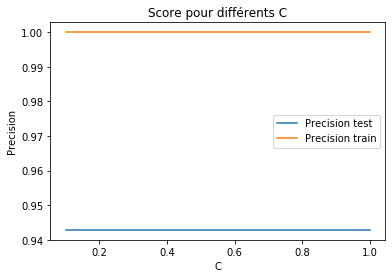

In [27]:
import matplotlib.pyplot as plt

plt.plot([x for x in Cs], scores_c_test)
plt.plot([x for x in Cs], scores_c_train)

plt.legend(['Precision test', 'Precision train'], loc='best')
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Score pour différents C")

In [18]:
from sklearn.metrics import confusion_matrix

clf = SVC(kernel="poly", gamma="auto")

clf.fit(xtrain, ytrain)

found_classes = clf.predict(xtest)

cm = confusion_matrix(ytest, found_classes)

print(cm)

[[171   0   1   1   0   2   1   0   1   0]
 [  0 231   1   1   0   0   0   0   0   0]
 [  3   2 214   2   3   0   1   2   1   2]
 [  1   2   3 196   0   3   0   3   3   2]
 [  0   0   1   0 194   0   0   0   0   8]
 [  0   1   0   4   0 174   1   2   1   3]
 [  4   0   1   0   1   0 184   0   1   0]
 [  0   2   2   1   0   0   0 214   0   3]
 [  1   6   2   3   2   3   1   1 205   6]
 [  1   1   2   2   6   0   0   5   1 197]]
